In [1]:
from sklearn.datasets import fetch_openml
#mnist = fetch_openml('/train-images-idx3-ubyte/train-images-idx3-ubyte', version=1, cache=True)

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Access data and labels
X, y = mnist.data, mnist.target

# Convert labels to integers if needed
#y = y.astype(int)

# Display dataset information
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (labels): {y.shape}")


/Users/abdalla/opt/anaconda3/envs/py-tf-torch-shap-env/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Shape of X (features): (70000, 784)
Shape of y (labels): (70000,)


## Visualize the data

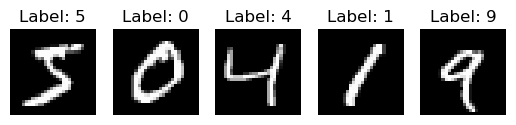

In [2]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, make_scorer, r2_score 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the images
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()

## Split and Explore the data

In [3]:
from sklearn.model_selection import train_test_split

#X, y = penguins[penguin_features].values, penguins[penguin_label].values

features = list(X)
label = list(y)

y = y.astype(int)

label_classes = pd.unique(y).astype(str)
print("label_classes", label_classes)

# Split data 6000-1000 into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X,y ,test_size=0.14285714, random_state=0,  stratify=label)

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0,2):
    print(x_train[n], y_train[n], '(' + label_classes[y_train[n]] + ')')

label_classes ['5' '0' '4' '1' '9' '2' '3' '6' '7' '8']
Training Set: 60000, Test Set: 10000 

Sample of features and labels:
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.  

## Normalize the dataset

In [4]:
# Normalize pixel values to the range [0, 1]
#x_train = x_train / 255.0
#x_test = x_test / 255.0

x_train = (x_train / 255.0).astype(np.float32)
x_test = (x_test / 255.0).astype(np.float32)

In [5]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 50 components
pca = PCA(n_components=50)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

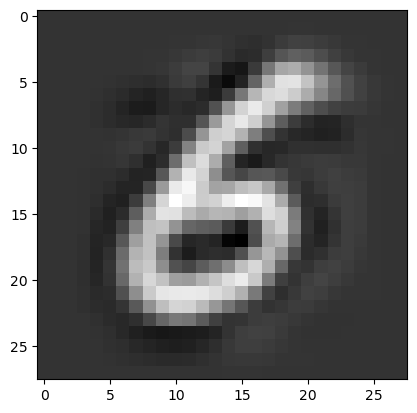

In [6]:
reconstructed_image = pca.inverse_transform(x_test[0])
plt.imshow(reconstructed_image.reshape(28, 28), cmap="gray")
plt.show()

## Optimazation Hyperparameters

### LogisticRegression Hyperparameters

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Use a Gradient Boosting algorithm
alg = LogisticRegression()

# Try these hyperparameter values
params = {
 'C': [0.1, 1, 10],
 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
  'max_iter' : [50, 100, 1000]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(x_train, y_train)

print("Best Parameters:", gridsearch.best_params_)
print("Best Cross-Validation Score:", gridsearch.best_score_)

#print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

### SVC Hyperparameters

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Use a Gradient Boosting algorithm
alg = SVC()

# Try these hyperparameter values
params = {
 'C': [0.1, 1, 10],
 'kernel':['linear', 'rbf']
       }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring='accuracy', cv=3, return_train_score=True)
gridsearch.fit(x_train, y_train)

print("Best Parameters:", gridsearch.best_params_)
print("Best Cross-Validation Score:", gridsearch.best_score_)

#print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

### HistGradientBoostingClassifier Hyperparameters

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Use a Gradient Boosting algorithm
alg = HistGradientBoostingClassifier()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 1, 10],
 'max_iter' : [50, 1000, 10000],
 'max_leaf_nodes':[31,63,127,255]
   }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring='accuracy', cv=3, return_train_score=True)
gridsearch.fit(x_train, y_train)

print("Best Parameters:", gridsearch.best_params_)
print("Best Cross-Validation Score:", gridsearch.best_score_)

#print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

### KNeighborsClassifier Hyperparameters

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Use a Gradient Boosting algorithm
alg = KNeighborsClassifier()

# Try these hyperparameter values
params = {
'n_neighbors':[5,7,9,13,15],   
'weights': ['uniform', 'distance'], 
'metric':['minkowski','euclidean','manhattan']
   }
#'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(x_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

## Training and Evaluating by using Multiclass Classification Model ##
### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
LogisticRegression_model = LogisticRegression(C=reg/1, max_iter=100, solver='saga') .fit(x_train, y_train)
print (LogisticRegression_model)

LogisticRegression(C=0.1, solver='saga')


### Comparing training data and predicted lables

In [55]:
label_predictions_LogisticRegression_model = LogisticRegression_model.predict(x_test)
print('Predicted labels: ', label_predictions_LogisticRegression_model[:30])
print('Actual labels   : ' ,y_test[:30])

Predicted labels:  [6 2 6 4 0 2 6 7 3 0 5 7 0 1 1 1 0 3 6 3 0 4 2 3 9 6 5 9 8 8]
Actual labels   :  [6 2 6 4 0 2 6 7 9 0 5 7 0 1 1 1 3 3 6 3 8 4 2 3 9 6 5 9 8 8]


### View Score of Metrix

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       986
           1       0.94      0.98      0.96      1125
           2       0.91      0.88      0.90       999
           3       0.89      0.87      0.88      1020
           4       0.91      0.92      0.91       975
           5       0.87      0.86      0.86       902
           6       0.93      0.95      0.94       982
           7       0.94      0.92      0.93      1042
           8       0.87      0.85      0.86       975
           9       0.87      0.88      0.88       994

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000
 

Overall Accuracy: 0.9096
Overall Precision: 0.9083844491054988
Overall Recall: 0.9082263809548607
Average AUC: 0.9920492027565633 

[[ 953    0    1    4    2    8    7    0    8    3]
 [   0 1104    4    2    0    6    1    1    7    0]
 

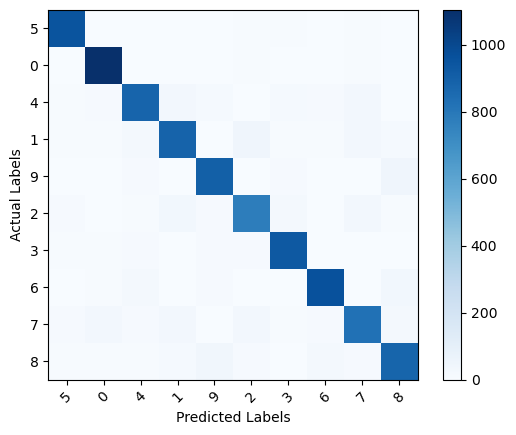

Confusion matrix:
[[ 953    0    1    4    2    8    7    0    8    3]
 [   0 1104    4    2    0    6    1    1    7    0]
 [   5    9  884   26   17    2   14   11   27    4]
 [   5    8   20  885    1   44    5    8   30   14]
 [   1    3    9    1  899    1   10    1    3   47]
 [  10    3    8   31   11  774   25    3   29    8]
 [   5    6   10    0   12   11  931    2    4    1]
 [   2    6   21    4    9    1    1  963    2   33]
 [  11   29   12   26    4   30    8    9  826   20]
 [   7    7    5   13   38   11    0   25   11  877]]


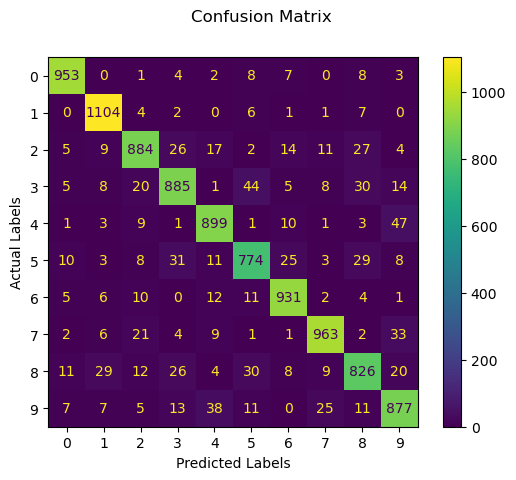

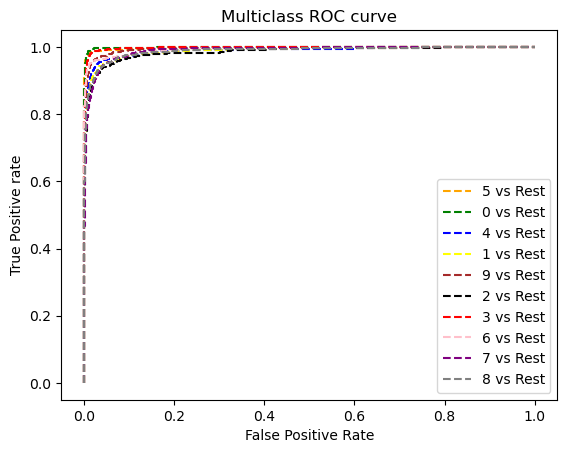

In [56]:

# Get class probability scores
label_prob_LogisticRegression_m = LogisticRegression_model.predict_proba(x_test)

#Print the report
print(classification_report(y_test, label_predictions_LogisticRegression_model), "\n")

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, label_predictions_LogisticRegression_model))
print("Overall Precision:",precision_score(y_test, label_predictions_LogisticRegression_model, average='macro'))
print("Overall Recall:",recall_score(y_test, label_predictions_LogisticRegression_model, average='macro'))
print('Average AUC:', roc_auc_score(y_test,label_prob_LogisticRegression_m, multi_class='ovr'),"\n")

# Print the confusion matrix
LogisticRegression_cm = confusion_matrix(y_test, label_predictions_LogisticRegression_model)
print(LogisticRegression_cm,"\n")

# Confusion matrix
plt.imshow(LogisticRegression_cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(label_classes))
plt.xticks(tick_marks, label_classes, rotation=45)
plt.yticks(tick_marks, label_classes)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, label_predictions_LogisticRegression_model)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


# ROC CURVE
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(label_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, label_prob_LogisticRegression_m[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=label_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=label_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=label_classes[2] + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label=label_classes[3] + ' vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='brown', label=label_classes[4] + ' vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label=label_classes[5] + ' vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='red', label=label_classes[6] + ' vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='pink', label=label_classes[7] + ' vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='purple', label=label_classes[8] + ' vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='gray', label=label_classes[9] + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]

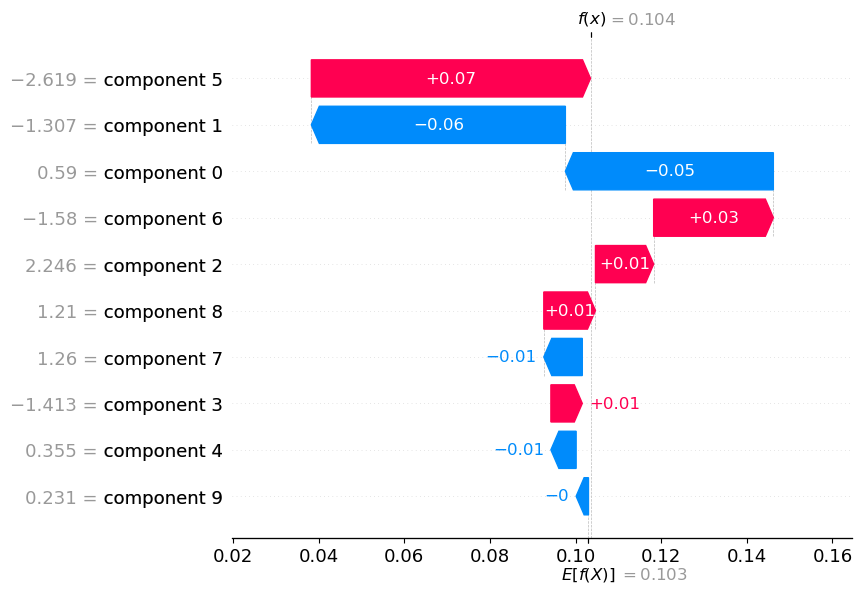

In [46]:
import shap
# Create SHAP explainer for reduced data
#explainer = shap.KernelExplainer(KNeighborsClassifier_model.predict_proba, x_train[:500])

background_data = shap.sample(x_train, 100)  # Summarize background with 100 samples
explainer = shap.KernelExplainer(LogisticRegression_model.predict_proba, background_data)

# Compute SHAP values for the first test instance
#shap_values = explainer(X)
shap_values = explainer.shap_values(x_test[:1])

# Plot the explanation
#ishap.plots.waterfall(shap_values[0])
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[0,0],
        base_values=explainer.expected_value[0],
        data=x_test[0],
        feature_names=[f"component {i}" for i in range(x_test.shape[1])]
    ),
    max_display=20
)

#shap.summary_plot(shap_values, x_test_pca, feature_names=[f"pixel {i}" for i in range(x_test_pca.shape[1])], max_display=20)



## Using SVC model

In [12]:
from sklearn.svm import SVC
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')

# Set regularization rate
regSVC = 10

# train a logistic regression model on the training set
SVC_model= SVC(C=regSVC, probability=True, max_iter=10000, kernel= 'rbf').fit(x_train, y_train)
print (SVC_model)

SVC(C=10, max_iter=10000, probability=True)


### Evaluating the new model.

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       986
           1       0.99      0.99      0.99      1125
           2       0.98      0.99      0.98       999
           3       0.99      0.98      0.98      1020
           4       0.98      0.99      0.99       975
           5       0.98      0.99      0.99       902
           6       0.99      0.99      0.99       982
           7       0.99      0.98      0.98      1042
           8       0.98      0.98      0.98       975
           9       0.99      0.98      0.98       994

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Overall Accuracy: 0.9865
Overall Precision: 0.9864163255476768
Overall Recall: 0.9864430351750437
Average AUC: 0.9997260878217139 

[[ 977    1    0    0    0    1    3    0    3    1]
 [   0 1119    3    0    0    0    0    2    1    0]
 [ 

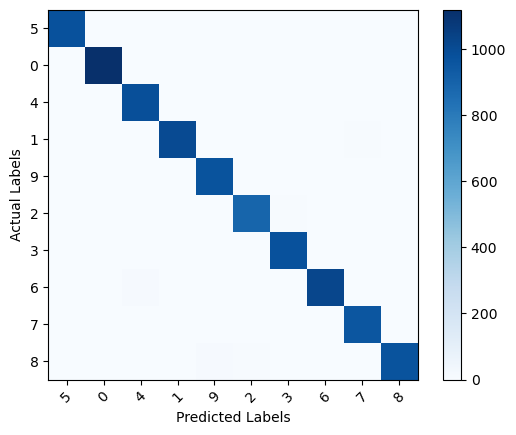

Confusion matrix:
[[ 977    1    0    0    0    1    3    0    3    1]
 [   0 1119    3    0    0    0    0    2    1    0]
 [   0    1  986    3    3    0    1    3    2    0]
 [   0    0    4 1003    0    3    0    1    7    2]
 [   0    1    1    0  967    0    1    1    0    4]
 [   1    1    0    3    1  889    6    0    0    1]
 [   0    0    0    0    2    2  977    0    1    0]
 [   0    2   12    2    3    0    0 1020    1    2]
 [   0    1    3    4    0    3    2    1  957    4]
 [   1    2    0    3    9    5    1    2    1  970]]


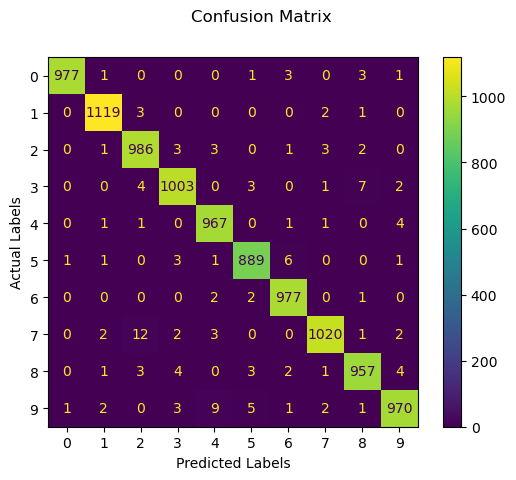

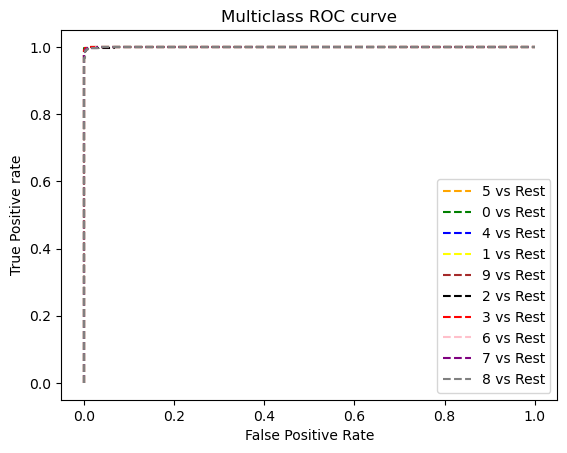

In [13]:
label_predictions_SVC = SVC_model.predict(x_test)
label_prob_SVC = SVC_model.predict_proba(x_test)

#Print the report
print(classification_report(y_test, label_predictions_SVC))

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, label_predictions_SVC))
print("Overall Precision:",precision_score(y_test, label_predictions_SVC, average='macro'))
print("Overall Recall:",recall_score(y_test, label_predictions_SVC, average='macro'))
print('Average AUC:', roc_auc_score(y_test,label_prob_SVC, multi_class='ovr'),"\n")

# Print the confusion matrix
SVC_cm = confusion_matrix(y_test, label_predictions_SVC)
print(SVC_cm,"\n")

# Confusion matrix
plt.imshow(SVC_cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(label_classes))
plt.xticks(tick_marks, label_classes, rotation=45)
plt.yticks(tick_marks, label_classes)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, label_predictions_SVC)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


# ROC CURVE
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(label_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, label_prob_SVC[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=label_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=label_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=label_classes[2] + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label=label_classes[3] + ' vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='brown', label=label_classes[4] + ' vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label=label_classes[5] + ' vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='red', label=label_classes[6] + ' vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='pink', label=label_classes[7] + ' vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='purple', label=label_classes[8] + ' vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='gray', label=label_classes[9] + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]

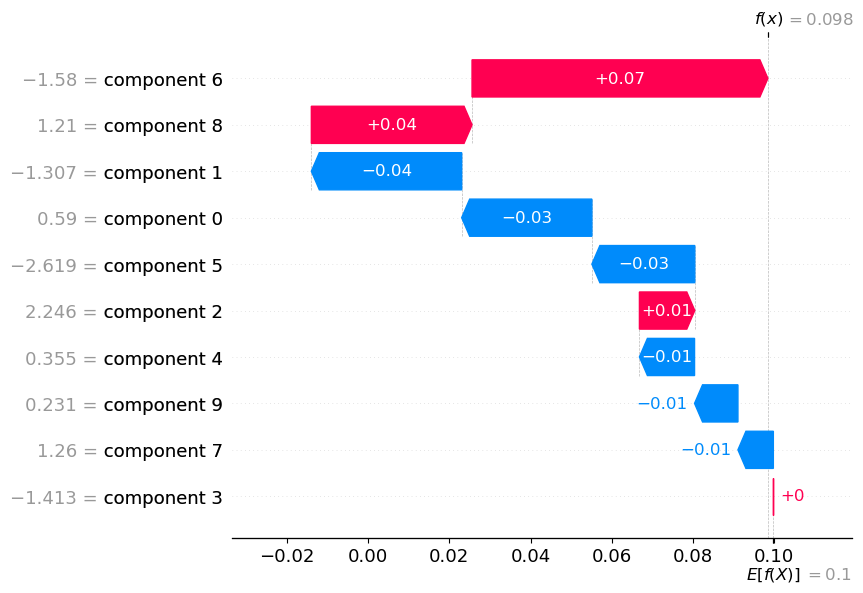

In [14]:
import shap
# Create SHAP explainer for reduced data
#explainer = shap.KernelExplainer(KNeighborsClassifier_model.predict_proba, x_train[:500])

background_data = shap.sample(x_train, 100)  # Summarize background with 100 samples
explainer = shap.KernelExplainer(SVC_model.predict_proba, background_data)

# Compute SHAP values for the first test instance
#shap_values = explainer(X)
shap_values = explainer.shap_values(x_test[:1])

# Plot the explanation
#ishap.plots.waterfall(shap_values[0])
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[0,0],
        base_values=explainer.expected_value[0],
        data=x_test[0],
        feature_names=[f"component {i}" for i in range(x_test.shape[1])]
    ),
    max_display=20
)

#shap.summary_plot(shap_values, x_test_pca, feature_names=[f"pixel {i}" for i in range(x_test_pca.shape[1])], max_display=20)



## HistGradient Boosting Classifier

In [15]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Fit a lasso model on the training set
GradientBoostingClassifier_model= HistGradientBoostingClassifier(learning_rate = 0.1, max_iter=1000, max_leaf_nodes = 31).fit(x_train, y_train)

print(GradientBoostingClassifier_model,"\n")

HistGradientBoostingClassifier(max_iter=1000) 



              precision    recall  f1-score   support

           0       0.99      0.98      0.99       986
           1       0.99      0.99      0.99      1125
           2       0.96      0.98      0.97       999
           3       0.97      0.96      0.97      1020
           4       0.97      0.97      0.97       975
           5       0.97      0.97      0.97       902
           6       0.98      0.98      0.98       982
           7       0.98      0.96      0.97      1042
           8       0.95      0.97      0.96       975
           9       0.95      0.95      0.95       994

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Overall Accuracy: 0.9717
Overall Precision: 0.9714176238723125
Overall Recall: 0.9714637635536937
Average AUC: 0.9992562933773318
[[ 969    0    1    0    1    1    6    0    6    2]
 [   0 1117    3    0    0    0    1    2    1    1]
 [   

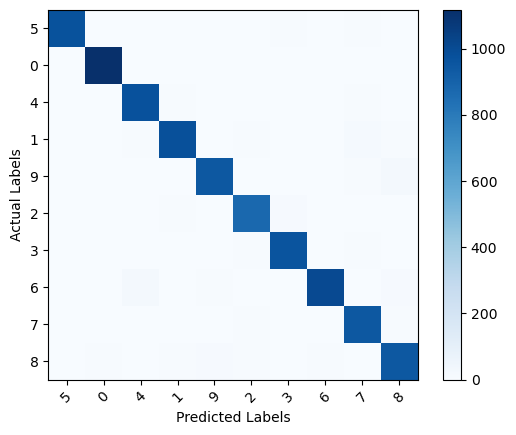

Confusion matrix:
[[ 969    0    1    0    1    1    6    0    6    2]
 [   0 1117    3    0    0    0    1    2    1    1]
 [   1    1  976    5    3    1    2    4    6    0]
 [   0    0    6  981    1    7    1    4   15    5]
 [   1    0    3    0  943    0    2    1    5   20]
 [   1    0    2    7    3  874    9    0    4    2]
 [   2    1    0    0    2    5  964    0    7    1]
 [   0    1   18    3    5    0    0 1004    2    9]
 [   0    3    4    3    3    8    2    1  944    7]
 [   4    5    1    8   12    8    0    7    4  945]]


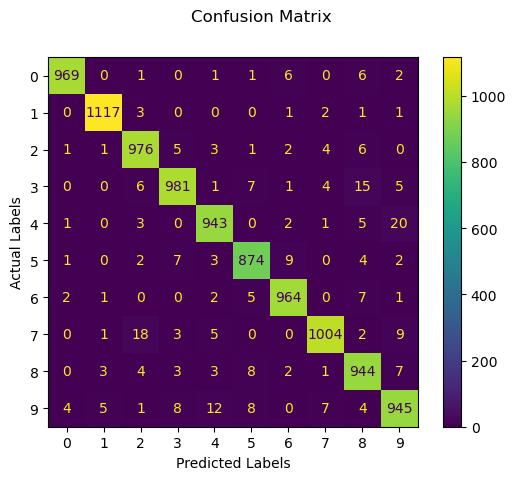

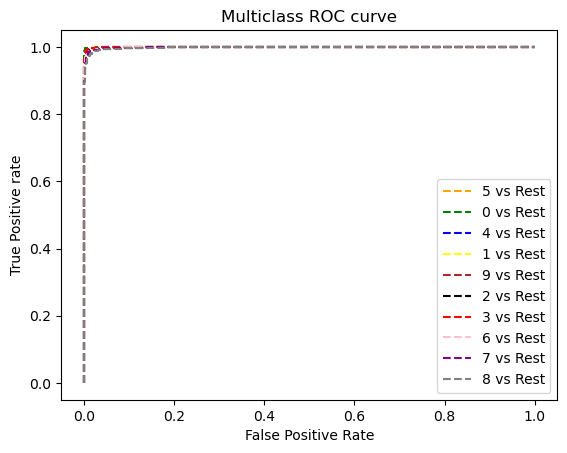

In [16]:
label_predictions_GBC = GradientBoostingClassifier_model.predict(x_test)
label_prob_GBC = GradientBoostingClassifier_model.predict_proba(x_test)

#Print the report
print(classification_report(y_test, label_predictions_GBC))

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, label_predictions_GBC))
print("Overall Precision:",precision_score(y_test, label_predictions_GBC, average='macro'))
print("Overall Recall:",recall_score(y_test, label_predictions_GBC, average='macro'))
print('Average AUC:', roc_auc_score(y_test,label_prob_GBC, multi_class='ovr'))

# Print the confusion matrix
GBR_cm = confusion_matrix(y_test, label_predictions_GBC)
print(GBR_cm)

# Confusion matrix
plt.imshow(GBR_cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(label_classes))
plt.xticks(tick_marks, label_classes, rotation=45)
plt.yticks(tick_marks, label_classes)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, label_predictions_GBC)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

# ROC CURVE
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(label_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, label_prob_GBC[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=label_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=label_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=label_classes[2] + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label=label_classes[3] + ' vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='brown', label=label_classes[4] + ' vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label=label_classes[5] + ' vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='red', label=label_classes[6] + ' vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='pink', label=label_classes[7] + ' vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='purple', label=label_classes[8] + ' vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='gray', label=label_classes[9] + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]

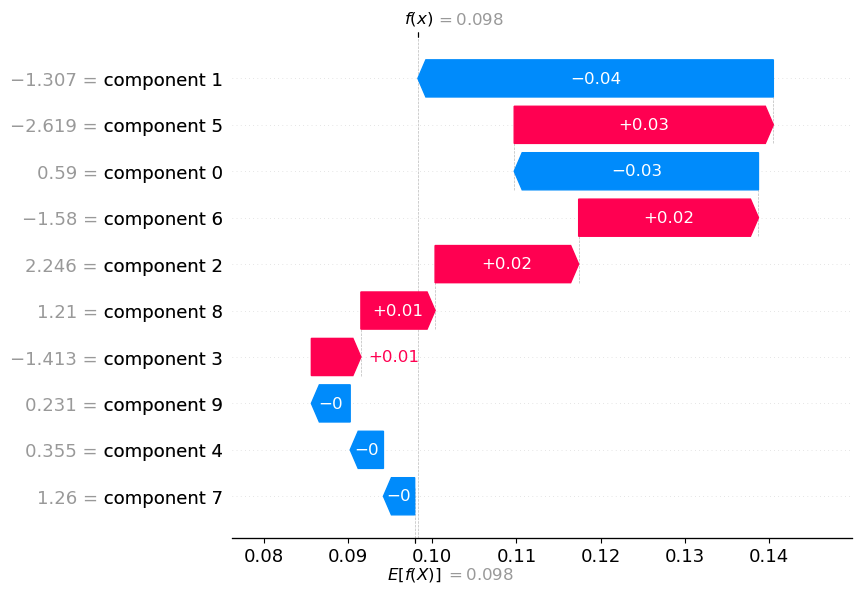

In [17]:
import shap
# Create SHAP explainer for reduced data
#explainer = shap.KernelExplainer(KNeighborsClassifier_model.predict_proba, x_train[:500])

background_data = shap.sample(x_train, 100)  # Summarize background with 100 samples
explainer = shap.KernelExplainer(GradientBoostingClassifier_model.predict_proba, background_data)

# Compute SHAP values for the first test instance
#shap_values = explainer(X)
shap_values = explainer.shap_values(x_test[:1])

# Plot the explanation
#ishap.plots.waterfall(shap_values[0])
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[0,0],
        base_values=explainer.expected_value[0],
        data=x_test[0],
        feature_names=[f"component {i}" for i in range(x_test.shape[1])]
    ),
    max_display=20
)

#shap.summary_plot(shap_values, x_test_pca, feature_names=[f"pixel {i}" for i in range(x_test_pca.shape[1])], max_display=20)



In [18]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier_model= KNeighborsClassifier(metric='minkowski', n_neighbors= 5, weights ='distance').fit(x_train, y_train)

print(KNeighborsClassifier_model,"\n")

KNeighborsClassifier(weights='distance') 



  0%|          | 0/1 [00:00<?, ?it/s]

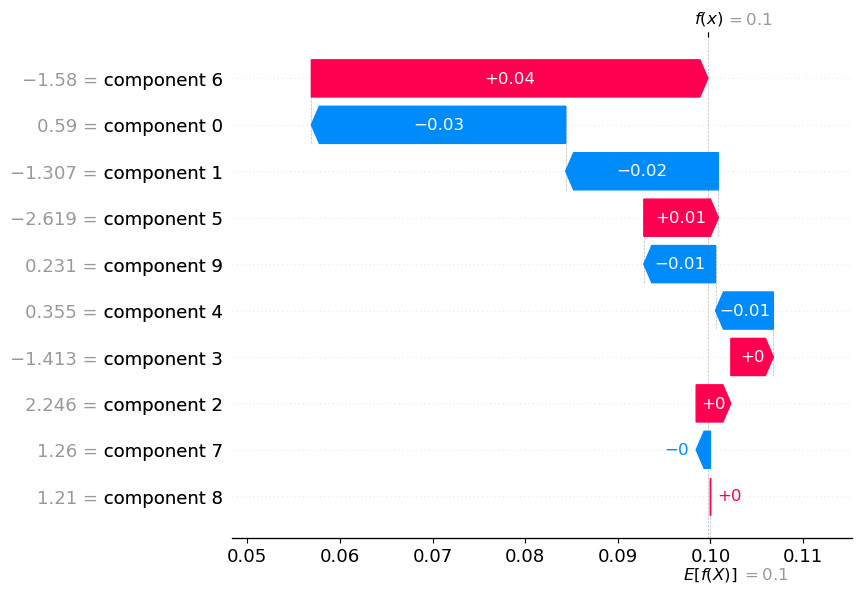

In [19]:
import shap
# Create SHAP explainer for reduced data
#explainer = shap.KernelExplainer(KNeighborsClassifier_model.predict_proba, x_train[:500])

background_data = shap.sample(x_train, 100)  # Summarize background with 100 samples
explainer = shap.KernelExplainer(KNeighborsClassifier_model.predict_proba, background_data)

# Compute SHAP values for the first test instance
#shap_values = explainer(X)
shap_values = explainer.shap_values(x_test[:1])

# Plot the explanation
#ishap.plots.waterfall(shap_values[0])
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[0,0],
        base_values=explainer.expected_value[0],
        data=x_test[0],
        feature_names=[f"component {i}" for i in range(x_test.shape[1])]
    ),
    max_display=20
)

#shap.summary_plot(shap_values, x_test_pca, feature_names=[f"pixel {i}" for i in range(x_test_pca.shape[1])], max_display=20)



              precision    recall  f1-score   support

           0       0.99      0.99      0.99       986
           1       0.98      1.00      0.99      1125
           2       0.98      0.98      0.98       999
           3       0.98      0.98      0.98      1020
           4       0.98      0.97      0.97       975
           5       0.99      0.98      0.98       902
           6       0.98      0.99      0.99       982
           7       0.98      0.98      0.98      1042
           8       0.99      0.97      0.98       975
           9       0.96      0.97      0.96       994

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Overall Accuracy: 0.9804
Overall Precision: 0.9805005012006758
Overall Recall: 0.9801535213473264
Average AUC: 0.9968123747238604
[[ 974    2    3    0    0    2    2    0    2    1]
 [   0 1121    2    0    0    0    1    1    0    0]
 [   

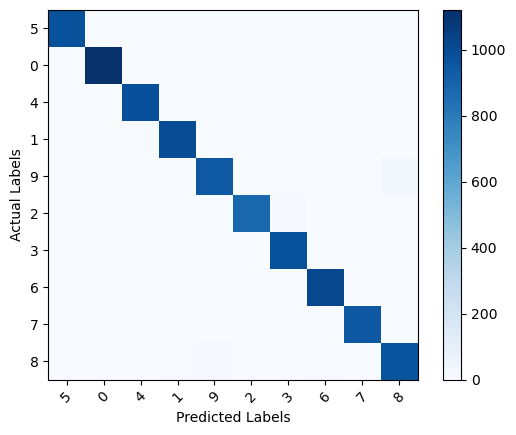

Confusion matrix:
[[ 974    2    3    0    0    2    2    0    2    1]
 [   0 1121    2    0    0    0    1    1    0    0]
 [   3    1  981    1    1    1    1    7    3    0]
 [   0    1    5  996    0    6    0    3    6    3]
 [   1    5    0    0  943    0    2    1    0   23]
 [   0    0    0    6    1  881   11    0    0    3]
 [   2    2    0    0    0    2  975    0    1    0]
 [   0    5    6    1    3    0    0 1020    0    7]
 [   2    4    4    4    2    2    2    0  949    6]
 [   3    3    1    5   10    0    1    5    2  964]]


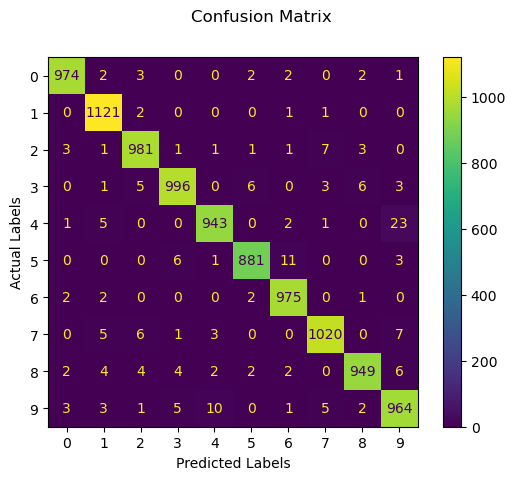

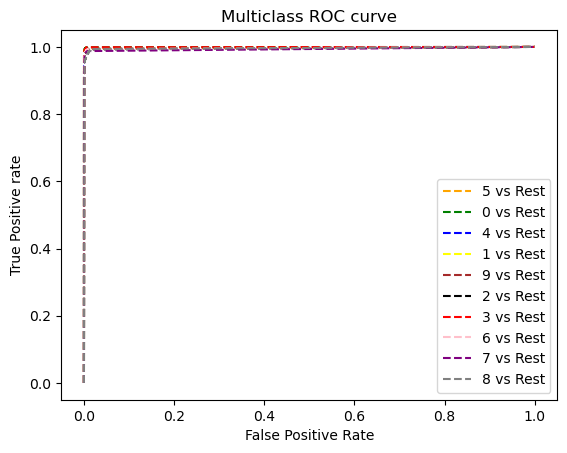

In [20]:
label_predictions_KNN = KNeighborsClassifier_model.predict(x_test)
label_prob_KNN = KNeighborsClassifier_model.predict_proba(x_test)

#Print the report
print(classification_report(y_test, label_predictions_KNN))

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_test, label_predictions_KNN))
print("Overall Precision:",precision_score(y_test, label_predictions_KNN, average='macro'))
print("Overall Recall:",recall_score(y_test, label_predictions_KNN, average='macro'))
print('Average AUC:', roc_auc_score(y_test,label_prob_KNN, multi_class='ovr'))

# Print the confusion matrix
KNN_cm = confusion_matrix(y_test, label_predictions_KNN)
print(KNN_cm)

# Confusion matrix
plt.imshow(KNN_cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(label_classes))
plt.xticks(tick_marks, label_classes, rotation=45)
plt.yticks(tick_marks, label_classes)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, label_predictions_KNN)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()


# ROC CURVE
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(label_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, label_prob_KNN[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=label_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=label_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=label_classes[2] + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label=label_classes[3] + ' vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='brown', label=label_classes[4] + ' vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label=label_classes[5] + ' vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='red', label=label_classes[6] + ' vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='pink', label=label_classes[7] + ' vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='purple', label=label_classes[8] + ' vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='gray', label=label_classes[9] + ' vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

# DNN

### Visualizing normalized images

(784,)


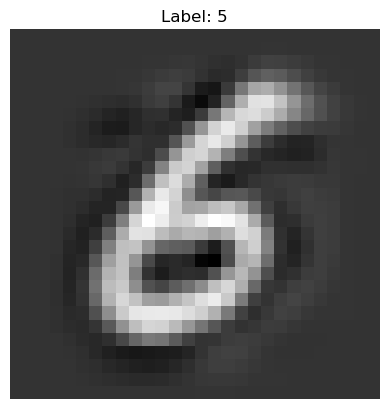

In [21]:
# Visualize normalized images
reconstructed_image = pca.inverse_transform(x_test[0])
#plt.imshow(reconstructed_image.reshape(28, 28), cmap="gray")
#plt.show()

#print(x_train[0].shape)
#plt.imshow(x_train[0].reshape(28,28), cmap='gray')
#plt.title(f"Label: {y_train[0]}")
#plt.axis('off')
#plt.show()

print(reconstructed_image.shape)
plt.imshow(reconstructed_image.reshape(28,28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()


## Using TensorFlow

### Preparing tensorflow libraries

In [75]:
import tensorflow
from tensorflow import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras import utils
from keras import optimizers
from keras.utils import to_categorical


# Set random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('TensorFlow version:',tensorflow.__version__)
print('Keras version:',keras.__version__)

Libraries imported.
TensorFlow version: 2.17.0
Keras version: 3.6.0



### Reshaping images and converting labels to one-hot encoding

In [59]:
print("--- defualt features and labels shape --- ")
print("xtrain:", x_train.shape)
print("ytrain:", y_train.shape)
print("xtest:", x_test.shape)
print("ytrain:", y_test.shape ,"\n")

# Set data types for float features and reshape to 784
DNN_x_train = x_train
DNN_x_test = x_test

#DNN_x_train = DNN_x_train.reshape(-1, 784).astype('float32')
#DNN_x_test = DNN_x_test.reshape(-1, 784).astype('float32')

#DNN_x_train = pca.inverse_transform(DNN_x_train).reshape(-1, 50).astype('float32')
#DNN_x_test = pca.inverse_transform(DNN_x_test).reshape(-1, 50).astype('float32')

print("--- after reshaping features to 784 --- ")
print("DD xtrain:", DNN_x_train.shape)
print("ytrain:", y_train.shape)
print("DD xtest:", DNN_x_test.shape)
print("ytrain:", y_test.shape ,"\n")

# Convert labels to one-hot encoding
DNN_y_train = y_train
DNN_y_test = y_test

DNN_y_train = utils.to_categorical(DNN_y_train)
DNN_y_test = utils.to_categorical(DNN_y_test)

print("--- after converting labels to one-hot encoding --- ")
print("DD xtrain:", DNN_x_train.shape)
print("DD ytrain:", DNN_y_train.shape)
print("DD xtest:", DNN_x_test.shape)
print("DD ytrain:", DNN_y_test.shape ,"\n")

print('Ready...')

--- defualt features and labels shape --- 
xtrain: (60000, 50)
ytrain: (60000,)
xtest: (10000, 50)
ytrain: (10000,) 

--- after reshaping features to 784 --- 
DD xtrain: (60000, 50)
ytrain: (60000,)
DD xtest: (10000, 50)
ytrain: (10000,) 

--- after converting labels to one-hot encoding --- 
DD xtrain: (60000, 50)
DD ytrain: (60000, 10)
DD xtest: (10000, 50)
DD ytrain: (10000, 10) 

Ready...


### Defining Classifier network layers

In [118]:
# Define a classifier network 
hl = 32

# Number of hidden layer nodes 
# #label_classes = pd.unique(column_name[-1]) 

DNN_model = Sequential() 
DNN_model.add(Dense(hl, input_dim=DNN_x_train.shape[1], activation='relu')) 
DNN_model.add(Dense(hl, input_dim=64, activation='relu'))
DNN_model.add(Dense(hl, input_dim=128, activation='relu'))  
DNN_model.add(Dense(len(label_classes), input_dim=hl, activation='softmax'))  
print(DNN_model.summary())

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 32)             │         1,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,074 (15.91 KB)

 Trainable params: 4,074 (15.91 KB)

 Non-trainable params: 0 (0.00 B)

None


import tensorflow as tf
# Define the data augmentation parameters
DNN_x_train_reshaped = DNN_x_train.reshape(-1, 28, 28, 1)  # Assuming 28x28 grayscale images
DNN_x_test_reshaped = DNN_x_test.reshape(-1, 28, 28, 1)

# Apply ImageDataGenerator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator
datagen.fit(DNN_x_train_reshaped)

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define the model creation function
def create_model(hl=10, learning_rate=0.001, dropout_rate=0.0):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    from tensorflow.keras.optimizers import Adam
    
    model = Sequential()
    model.add(Dense(hl, input_dim=DNN_x_train.shape[1], activation='relu'))
    model.add(Dense(hl, activation='relu'))
    if dropout_rate > 0.0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(DNN_y_train.shape[1], activation='softmax'))
    opt = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the parameter grid
param_grid = {
    'hl': [10, 32, 64],  # Number of hidden layer nodes
    'learning_rate': [0.0001, 0.001, 0.01],  # Learning rate
    'dropout_rate': [0.0, 0.2],  # Dropout
    'batch_size': [10, 32, 64],  # Batch sizes
    'epochs': [10, 20]  # Number of epochs
}

# Perform GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)
grid_result = grid.fit(DNN_x_train, DNN_y_train)

# Output the best configuration
print(f"Best Score: {grid_result.best_score_}")
print(f"Best Params: {grid_result.best_params_}")


### Training the model

In [119]:
#hyper-parameters for optimizer
learning_rate = 0.001
opt = optimizers.Adam(learning_rate=learning_rate)

DNN_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 10
DNN_history = DNN_model.fit(DNN_x_train, DNN_y_train, epochs=num_epochs, batch_size=128, validation_data=(DNN_x_test, DNN_y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6255 - loss: 1.1891 - val_accuracy: 0.9166 - val_loss: 0.2716
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9209 - loss: 0.2643 - val_accuracy: 0.9403 - val_loss: 0.1994
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9396 - loss: 0.1988 - val_accuracy: 0.9504 - val_loss: 0.1666
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9500 - loss: 0.1633 - val_accuracy: 0.9568 - val_loss: 0.1467
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9566 - loss: 0.1411 - val_accuracy: 0.9606 - val_loss: 0.1344
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9611 - loss: 0.1264 - val_accuracy: 0.9628 - val_loss: 0.1258
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9640 - loss: 0.1157 - val_accuracy: 0.9650 - val_loss: 0.1191
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1071 - val_accuracy: 0.

### Visualize training and validation loss

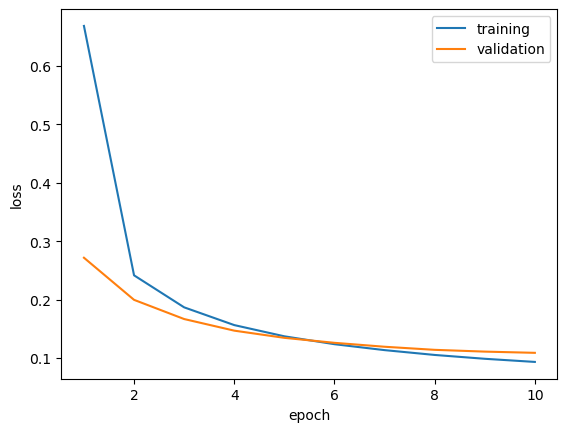

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


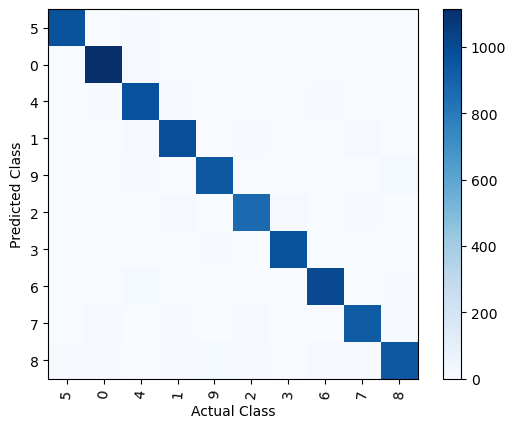

Confusion matrix:
[[ 964    0    6    1    1    3    4    0    3    4]
 [   0 1114    9    0    0    0    0    2    0    0]
 [   1    5  971    7    3    1    1    6    3    1]
 [   0    2   11  983    0    5    2    3   11    3]
 [   0    1    5    1  943    1    4    2    1   17]
 [   2    1    3   12    1  865   10    1    5    2]
 [   4    2    0    0    7    2  963    0    3    1]
 [   1    3   16    2    3    1    1 1005    3    7]
 [   2   10    4    5    3   11    4    4  925    7]
 [   5    5    1    7   14    6    1    9    6  940]]


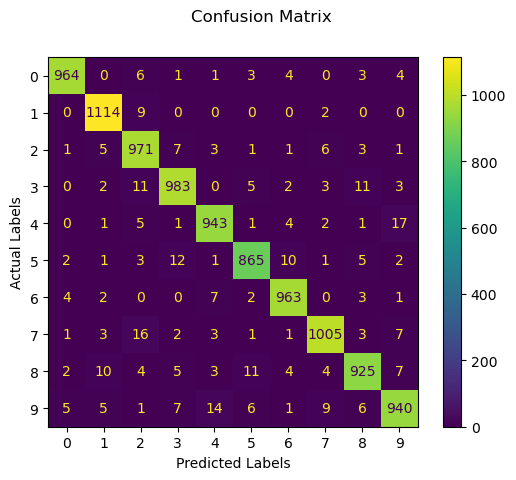

In [120]:
#  Review training and validation loss

epoch_nums = range(1,num_epochs+1)
training_loss = DNN_history.history["loss"]
validation_loss = DNN_history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()


# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn

class_probabilities = DNN_model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(DNN_y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(label_classes))
plt.xticks(tick_marks, label_classes, rotation=85)
plt.yticks(tick_marks, label_classes)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

disp = metrics.ConfusionMatrixDisplay.from_predictions(true_labels, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

# CNN

## Save the image from MNIST dataset to disk


import os
from PIL import Image


base_dir = "mnist_images"
os.makedirs(base_dir, exist_ok=True)

# Create subdirectories for each digit (0-9)
for digit in range(10):
    os.makedirs(os.path.join(base_dir, str(digit)), exist_ok=True)


# Reshape the data into 28x28 format
CNN_X = X
CNN_X = CNN_X.reshape(-1, 28, 28)

#y = y.reshape(-1, 28, 28)

# Save the images of each digit
for i, (image, label) in enumerate(zip(CNN_X, mnist.target)):
    label_dir = os.path.join(base_dir, label)
    image_path = os.path.join(label_dir, f"{label}_{i}.png")

    # Convert the image array to a Pillow image
    img = Image.fromarray((image ).astype(np.uint8))  # Rescale to 0-255    image*255

    # Save the image
    img.save(image_path)

    # Optional: Limit the number of images per digit
    #if len(os.listdir(label_dir)) >= 700:
    #    continue

## Explore and Visualize the data

10 classes:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


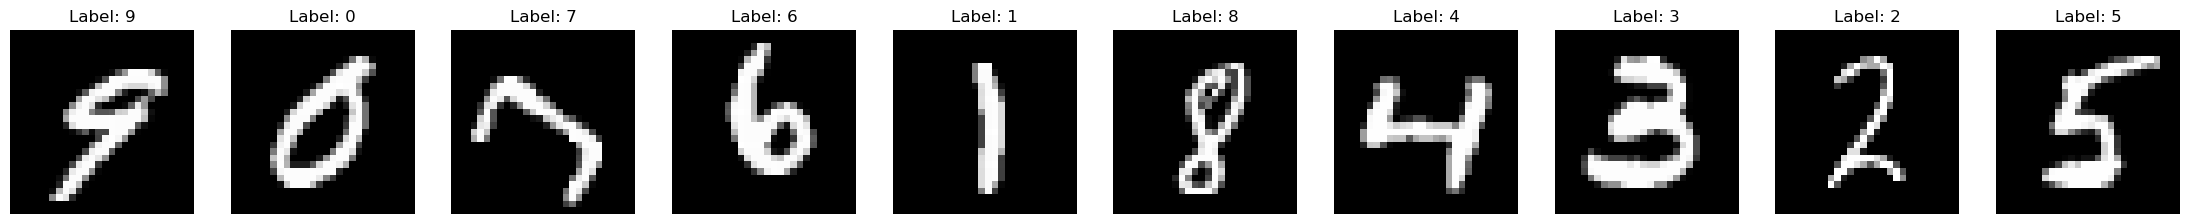

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


%matplotlib inline

# The images are in the data/shapes folder
data_folder = 'mnist_images'

# Get the class names
classes = os.listdir(data_folder)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(28, 28))
#y = y.astype(int)


i = 0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder,sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img, cmap='gray')
    a.set_title(f"Label: {sub_dir}")
    #a.set_title(img_file)
plt.show()

## Using TensorFlow

### Prepare the training and validation dataset

In [28]:
import tensorflow as tf
#from tf.keras.preprocessing.image import ImageDataGenerator

img_size = ( 28, 28)
batch_size = 32

print("Getting Data...")
datagen = tf.keras.preprocessing.image.ImageDataGenerator(#rescale=1./255, # normalize pixel values
                             validation_split=1.0/7.0,
                             rotation_range=10,          # Random rotation
                             width_shift_range=0.1,      # Horizontal shift
                             height_shift_range=0.1,     # Vertical shift
                             zoom_range=0.1,             # Random zoom
                             horizontal_flip=True,       # Random horizontal flipping
                             fill_mode='nearest'         ) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting Data...
Preparing training dataset...
Found 60004 images belonging to 10 classes.
Preparing validation dataset...
Found 9996 images belonging to 10 classes.
Data generators ready


### Defining CNN layers

In [29]:
# Define a CNN classifier network
import tensorflow
from tensorflow import keras
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
#from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define the model as a sequence of layers
CNN_model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
#model.add(Conv2D(32, (3, 3), input_shape=train_generator.image_shape, activation='relu'))
CNN_model.add(Conv2D(32, (3, 3), input_shape=(28,28,3), activation='relu'))


# Next we'll add a max pooling layer with a 2x2 patch
CNN_model.add(MaxPooling2D(pool_size=(2,2)))

# We can add as many layers as we think necessary - here we'll add another convolution and max pooling layer
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

# And another set
CNN_model.add(Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))

# A dropout layer randomly drops some nodes to reduce inter-dependencies (which can cause over-fitting)
CNN_model.add(Dropout(0.2))

# Flatten the feature maps 
CNN_model.add(Flatten())

# Generate a fully-connected output layer with a predicted probability for each class
# (softmax ensures all probabilities sum to 1)
CNN_model.add(Dense(train_generator.num_classes, activation='softmax'))

# With the layers defined, we can now compile the model for categorical (multi-class) classification
CNN_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(CNN_model.summary())

/Users/abdalla/opt/anaconda3/envs/py-tf-torch-shap-env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,538 (369.29 KB)

 Trainable params: 94,538 (369.29 KB)

 Non-trainable params: 0 (0.00 B)

None


### Training the CNN model

In [30]:
# Train the model over 5 epochs using 30-image batches and using the validation holdout dataset for validation
num_epochs = 10
history = CNN_model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/10


/Users/abdalla/opt/anaconda3/envs/py-tf-torch-shap-env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 123s 65ms/step - accuracy: 0.6597 - loss: 1.8991 - val_accuracy: 0.8896 - val_loss: 0.3429
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.9062 - loss: 0.6203 - val_accuracy: 0.8333 - val_loss: 0.9510
Epoch 3/10
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 2:56 94ms/step - accuracy: 0.8750 - loss: 0.4181

2024-12-18 21:18:15.194222: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/abdalla/opt/anaconda3/envs/py-tf-torch-shap-env/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-12-18 21:18:15.213486: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 108s 57ms/step - accuracy: 0.8832 - loss: 0.3788 - val_accuracy: 0.9159 - val_loss: 0.2714
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.9375 - loss: 0.2626 - val_accuracy: 0.8333 - val_loss: 0.6813
Epoch 5/10
   3/1875 ━━━━━━━━━━━━━━━━━━━━ 1:19 42ms/step - accuracy: 0.9601 - loss: 0.1326

2024-12-18 21:20:02.781211: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 105s 56ms/step - accuracy: 0.9064 - loss: 0.3060 - val_accuracy: 0.9176 - val_loss: 0.2728
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - accuracy: 0.8438 - loss: 0.3244 - val_accuracy: 1.0000 - val_loss: 0.1661
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 110s 59ms/step - accuracy: 0.9132 - loss: 0.2822 - val_accuracy: 0.9344 - val_loss: 0.2180
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.9062 - loss: 0.1699 - val_accuracy: 0.9167 - val_loss: 0.2674
Epoch 9/10
   3/1875 ━━━━━━━━━━━━━━━━━━━━ 1:26 46ms/step - accuracy: 0.9375 - loss: 0.3104

2024-12-18 21:23:37.847596: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - accuracy: 0.9237 - loss: 0.2506 - val_accuracy: 0.9342 - val_loss: 0.2220
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 13us/step - accuracy: 0.9062 - loss: 0.2908 - val_accuracy: 1.0000 - val_loss: 0.0697


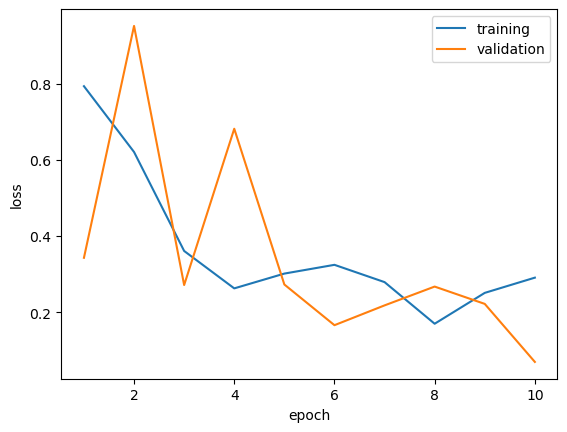

Generating predictions from validation data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


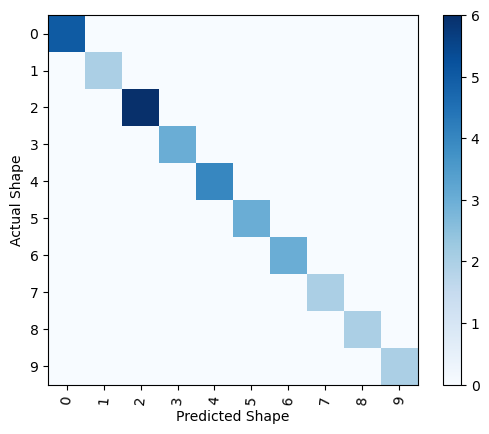

Confusion matrix:
[[5 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 2]]


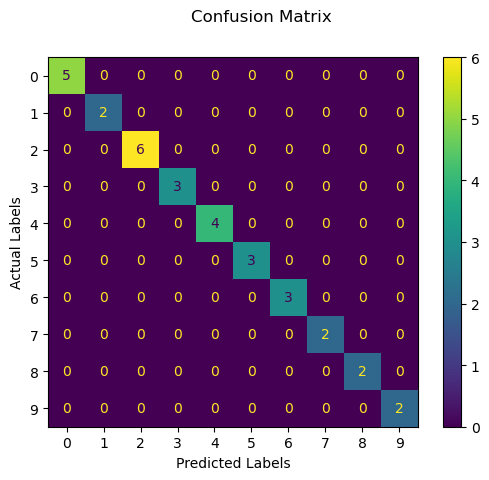

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()


# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
CNN_x_test = validation_generator[0][0]
CNN_y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = CNN_model.predict(CNN_x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(CNN_y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

disp = metrics.ConfusionMatrixDisplay.from_predictions(true_labels, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [32]:
# Save the trained model
modelFileName = 'models/mnist_classifier.h5'
CNN_model.save(modelFileName)
#del CNN_model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/mnist_classifier.h5


(28, 28, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Index:  1
(28, 28, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Index:  1
(28, 28, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Index:  1
(28, 28, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Index:  1
(28, 28, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Index:  1
(28, 28, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Index:  1
(28, 28, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Index:  1
(28, 28, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Index:  1
(28, 28, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Index:  1
(28, 28, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Index:  1


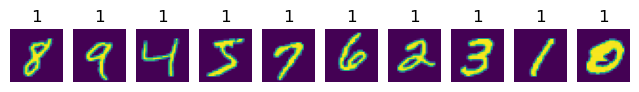

In [132]:
from keras import utils

# Function to predict the class of an image
def predict_image(classifier, image):
    from tensorflow import convert_to_tensor
    # The model expects a batch of images as input, so we'll create an array of 1 image
    #imgfeatures = np.array(img).reshape(1, img.shape[0], img.shape[1], img.shape[2], img.shape[3], img.shape[4], img.shape[5], img.shape[6], img.shape[7], img.shape[8], img.shape[9])
    # Ensure image is a numpy array
    img = np.array(image)
    
    # Convert grayscale to RGB if needed
    if len(img.shape) == 2:  # Grayscale image
        img = np.expand_dims(img, axis=-1)  # Add channel dimension
        img = np.repeat(img, 3, axis=-1)  # Convert to RGB

   
    print(img.shape)
    imgfeatures = np.array(img).reshape(1,* img.shape)


    # We need to format the input to match the training data
    # The generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    imgfeatures = imgfeatures.astype('float32')/255.0
        
    # Use the model to predict the image class
    class_probabilities = classifier.predict(imgfeatures)
    
    # Find the class predictions with the highest predicted probability
    index = int(np.argmax(class_probabilities, axis=1)[0])
    
    #output = classifier(input_features)
    #index = output.data.numpy().argmax() 
    
    # Return the predicted index
    print("Index: ",index)
    return index


# Load your model
CNN_Local_Tf_model = models.load_model(modelFileName) # loads the saved model


# The images are in the data/shapes folder
test_data_path = 'test'

# Show the test images with predictions
fig = plt.figure(figsize=(8, 12))
i = 0
for img_file in os.listdir(test_data_path):
    img_path = os.path.join(test_data_path, img_file)
    img = mpimg.imread(img_path)

    # Get the image class prediction    
    index = predict_image(CNN_Local_Tf_model, img)

     # Display the image with prediction
    i+=1
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    #a.set_title(img_file)
    a.set_title(classes[index])

plt.show()

## Using PyTorch libraries

### Importing PyTorch libraries

In [34]:
# Import PyTorch libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F

# Other libraries we'll use
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 2.2.2


10 classes:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


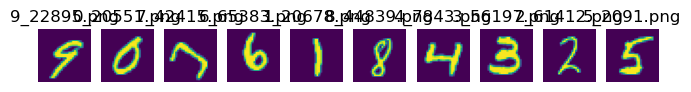

In [35]:
# The images are in the data/shapes folder
data_path = 'mnist_images'

# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(8, 12))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

### Create data loaders

In [36]:
# Function to ingest data using training and test loaders
def load_dataset(data_path):
    # Load all of the images
    transformation = transforms.Compose([

        # Data augmentation
        transforms.RandomRotation(10),        # Random rotation up to 10 degrees
        transforms.RandomHorizontalFlip(),    # Random horizontal flip
        transforms.RandomResizedCrop(28, scale=(0.8, 1.0)),  # Random crop and resize
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Random color jitter

        # transform to tensors
        transforms.ToTensor(),
        # Normalize the pixel values (in R, G, and B channels)
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    # Load all of the images, transforming them
    full_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transformation
    )
    
    
    # Split into training (70% and testing (30%) datasets)
    train_size = int(0.85714286 * len(full_dataset))
    test_size = len(full_dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    
    print("Full dataset: ",len(full_dataset), "\ntrain size: ",train_size, "\ntest size: ",test_size)

    # define a loader for the training data we can iterate through in 50-image batches
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=50,
        num_workers=0,
        shuffle=False
    )
    
    # define a loader for the testing data we can iterate through in 50-image batches
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=50,
        num_workers=0,
        shuffle=False
    )
        
    return train_loader, test_loader


# Get the iterative dataloaders for test and training data
train_loader, test_loader = load_dataset(data_path)
print('Data loaders ready')

Full dataset:  70000 
train size:  60000 
test size:  10000
Data loaders ready


### Define the CNN

In [123]:
# Create a neural net class
class Net(nn.Module):
    # Constructor
    def __init__(self, num_classes=10):
        super(Net, self).__init__()
        
        # Our images are RGB, so input channels = 3. We'll apply 12 filters in the first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # We'll apply max pooling with a kernel size of 2
        self.pool = nn.MaxPool2d(kernel_size=2)
        
        # A second convolutional layer takes 12 input channels, and generates 12 outputs
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        # A third convolutional layer takes 12 inputs and generates 24 outputs
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        
        # A drop layer deletes 20% of the features to help prevent overfitting
        self.drop = nn.Dropout2d(p=0.2)
        
        # Our 128x128 image tensors will be pooled twice with a kernel size of 2. 128/2/2 is 32.
        # So our feature tensors are now 32 x 32, and we've generated 24 of them
        # We need to flatten these and feed them to a fully-connected layer
        # to map them to  the probability for each class
        self.fc = nn.Linear(in_features=128* 7* 7, out_features=num_classes)

    def forward(self, x):
        # Use a relu activation function after layer 1 (convolution 1 and pool)
        x = F.relu(self.pool(self.conv1(x)))
      
        # Use a relu activation function after layer 2 (convolution 2 and pool)
        x = F.relu(self.pool(self.conv2(x)))
        
        # Select some features to drop after the 3rd convolution to prevent overfitting
        x = F.relu(self.drop(self.conv3(x)))
        
        # Only drop the features if this is a training pass
        x = F.dropout(x, training=self.training)
        
        # Flatten
        print("Shape before flattening:", x.shape)
        x = x.view(-1, 128 * 7 * 7)
        #x = x.view(x.size(0),-1)
        
        # Feed to fully-connected layer to predict class
        x = self.fc(x)
        # Return class probabilities via a log_softmax function 
        return F.log_softmax(x, dim=1)
    
print("CNN model class defined!")

CNN model class defined!


### Train the model

In [129]:
def train(model, device, train_loader, optimizer, epoch):
    # Set the model to training mode
    model.train()
    train_loss = 0
    print("Epoch:", epoch)
    # Process the images in batches
    for batch_idx, (data, target) in enumerate(train_loader):
        # Use the CPU or GPU as appropriate
        data, target = data.to(device), target.to(device)
        
        # Reset the optimizer
        optimizer.zero_grad()
        
        # Push the data forward through the model layers
        output = model(data)
        
        # Get the loss
        loss = loss_criteria(output, target)
        
        # Keep a running total
        train_loss += loss.item()
        
        # Backpropagate
        loss.backward()
        optimizer.step()
        
        # Print metrics for every 10 batches so we see some progress
        if batch_idx % 10 == 0:
            print('Training set [{}/{} ({:.0f}%)] Loss: {:.6f}'.format(
                batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
    # return average loss for the epoch
    avg_loss = train_loss / (batch_idx+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
            
            
def test(model, device, test_loader):
    # Switch the model to evaluation mode (so we don't backpropagate or drop)
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        batch_count = 0
        for data, target in test_loader:
            batch_count += 1
            data, target = data.to(device), target.to(device)
            
            # Get the predicted classes for this batch
            output = model(data)
            
            # Calculate the loss for this batch
            test_loss += loss_criteria(output, target).item()
            
            # Calculate the accuracy for this batch
            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target==predicted).item()

    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss
    
    
# Now use the train and test functions to train and test the model    

device = "cpu"
if (torch.cuda.is_available()):
    # if GPU available, use cuda (on a cpu, training will take a considerable length of time!)
    device = "cuda"
print('Training on', device)

# Create an instance of the model class and allocate it to the device
## Save the image from MNIST dataset to diskmodel = Net(num_classes=len(classes)).to(device)
CNN_PyTorch_model = Net(num_classes=len(classes)).to(device)

# Use an "Adam" optimizer to adjust weights
# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
optimizer = optim.Adam(CNN_PyTorch_model.parameters(), lr=0.001)

# Specify the loss criteria
loss_criteria = nn.CrossEntropyLoss()

# Track metrics in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 5 epochs (in a real scenario, you'd likely use many more)
epochs = 10
for epoch in range(1, epochs + 1):
        train_loss = train(CNN_PyTorch_model, device, train_loader, optimizer, epoch)
        test_loss = test(CNN_PyTorch_model, device, test_loader)
        epoch_nums.append(epoch)
        training_loss.append(train_loss)
        validation_loss.append(test_loss)

Training on cpu
Epoch: 1
Shape before flattening: torch.Size([50, 128, 7, 7])
Training set [0/60000 (0%)] Loss: 2.300850
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Training set [500/60000 (1%)] Loss: 2.178437
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50

### View the loss history

Check for overfitting.

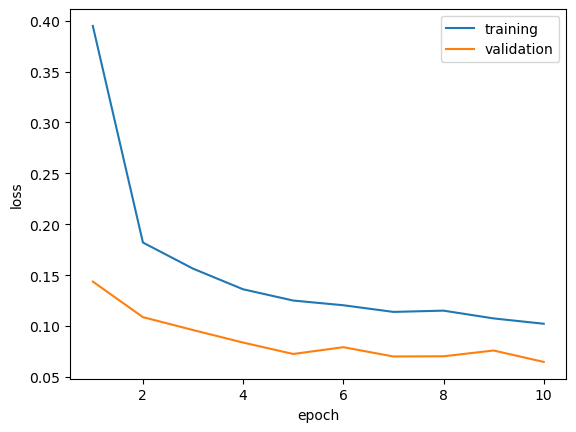

In [130]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

### Evaluate model performance

Getting predictions from test set...
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape before flattening: torch.Size([50, 128, 7, 7])
Shape bef

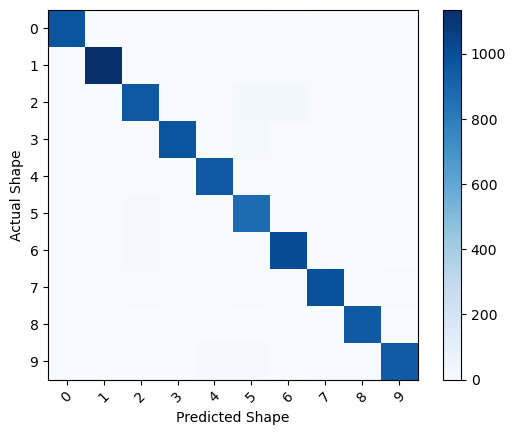

Confusion matrix:
[[ 971    0    1    0    0    0    6    0    1    0]
 [   1 1135    2    0    3    0    0    5    0    0]
 [   0    5  955    4    0   18   18    7    2    2]
 [   0    0    3  975    0   14    2    2    5    1]
 [   0    0    0    0  957    0    3    3    0    1]
 [   0    1   10    7    0  869    5    3    2    1]
 [   3    4    9    0    3    5 1010    0    3    0]
 [   0    2    6    0    1    5    0  992    0    6]
 [   0    0    3    4    4    0    2    0  949    3]
 [   2    0    1    2   11   11    0    8    8  943]]


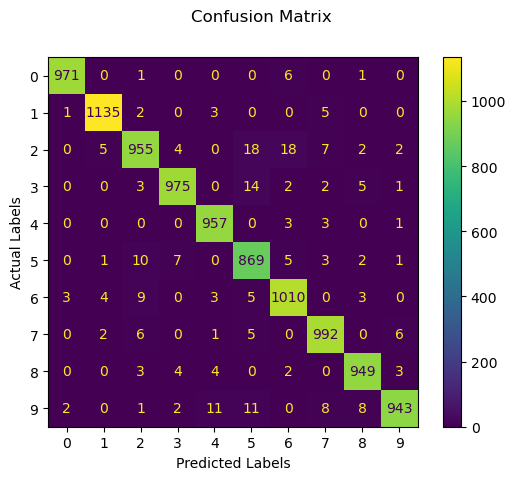

In [126]:
# Pytorch doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
from sklearn.metrics import confusion_matrix

# Set the model to evaluate mode
CNN_PyTorch_model.eval()

# Get predictions for the test data and convert to numpy arrays for use with SciKit-Learn
print("Getting predictions from test set...")
truelabels = []
predictions = []
for data, target in test_loader:
    for label in target.cpu().data.numpy():
        truelabels.append(label)
    for prediction in CNN_PyTorch_model.cpu()(data).data.numpy().argmax(1):
        predictions.append(prediction) 

# Plot the confusion matrix
cm = confusion_matrix(truelabels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

disp = metrics.ConfusionMatrixDisplay.from_predictions(truelabels, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

### Saving the model

In [41]:
# Save the model weights
pytorch_model_file = 'label_classifier.pt'
torch.save(CNN_PyTorch_model.state_dict(), pytorch_model_file)
#del CNN_PyTorch_model
print('model saved as', pytorch_model_file)

model saved as label_classifier.pt


Shape before flattening: torch.Size([1, 128, 7, 7])
Shape before flattening: torch.Size([1, 128, 7, 7])
Shape before flattening: torch.Size([1, 128, 7, 7])
Shape before flattening: torch.Size([1, 128, 7, 7])
Shape before flattening: torch.Size([1, 128, 7, 7])
Shape before flattening: torch.Size([1, 128, 7, 7])
Shape before flattening: torch.Size([1, 128, 7, 7])
Shape before flattening: torch.Size([1, 128, 7, 7])
Shape before flattening: torch.Size([1, 128, 7, 7])
Shape before flattening: torch.Size([1, 128, 7, 7])


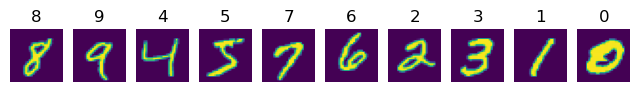

In [42]:
import matplotlib.pyplot as plt
import os
from random import randint
%matplotlib inline


# Function to predict the class of an image
def predict_image(classifier, image):
    import numpy
    
    # Default value
    index = 0
    
    # Set the classifer model to evaluation mode
    classifier.eval()
    

    if len(image.shape) == 2:  # Grayscale image
        image = np.expand_dims(image, axis=-1)  # Add channel dimension
        image = np.repeat(image, 3, axis=-1)  # Convert to RGB

    # Apply the same transformations as we did for the training images
    transformation = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    # Preprocess the image
    image_tensor = transformation(image).float()

    # Add an extra batch dimension since pytorch treats all inputs as batches
    image_tensor = image_tensor.unsqueeze_(0)

    # Turn the input into a Variable
    input_features = Variable(image_tensor)

    # Predict the class of the image
    output = classifier(input_features)
    index = output.data.numpy().argmax()
    return index


# Load your model
CNN_PyTorch_local_model = Net()
CNN_PyTorch_local_model.load_state_dict(torch.load(pytorch_model_file))

# The images are in the data/shapes folder
test_data_path = 'test'

# Show the test images with predictions
fig = plt.figure(figsize=(8, 12))
i = 0
for img_file in os.listdir(test_data_path):
    i+=1
    img_path = os.path.join(test_data_path, img_file)
    img = mpimg.imread(img_path)
    # Get the image class prediction
    index = predict_image(CNN_PyTorch_local_model, np.array(img))
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(classes[index])
plt.show()